
# Advanced Data Mining for Data-Driven Insights and Predictive Modeling  
## Deliverable 1: Data Collection, Cleaning, and Exploration

**Course:** MSCS 634  
**Deliverable:** 1  
**Focus:** Data Preparation and Exploratory Data Analysis (EDA)



## 1. Dataset Selection and Description

For this project, we use the **Titanic Passenger Dataset**, which contains demographic and travel information for passengers aboard the RMS Titanic.

**Why this dataset is appropriate:**
- Contains over **890 records**
- Includes **10+ attributes**
- Real-world dataset widely used for classification and regression tasks
- Includes missing values and mixed data types suitable for data cleaning and EDA

**Source:** Kaggle Titanic Dataset


In [37]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## 2. Dataset Structure Inspection


In [38]:

# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:

# Statistical summary
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



## 3. Data Cleaning
### 3.1 Handling Missing Values


In [40]:

# Check missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:

# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column due to excessive missing values
df = df.drop(columns=['Cabin'])

df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 3.2 Removing Duplicates


In [42]:

# Check for duplicates
df.duplicated().sum()


np.int64(0)

In [43]:

# Remove duplicates if any
df.drop_duplicates(inplace=True)



### 3.3 Handling Noisy and Inconsistent Data


In [44]:

# Check for unrealistic age values
df[df['Age'] < 0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked



## 4. Exploratory Data Analysis (EDA)


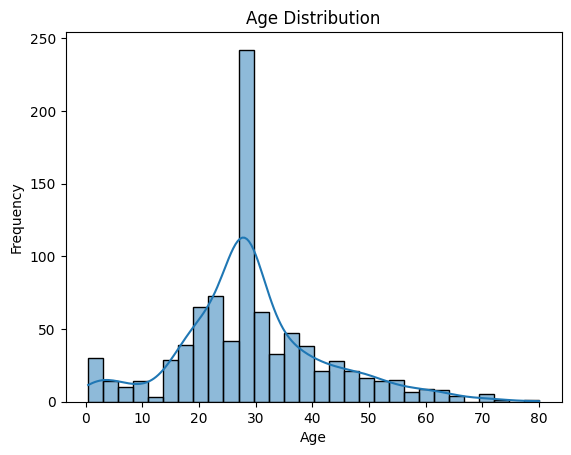

In [45]:

# Distribution of Age
plt.figure()
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


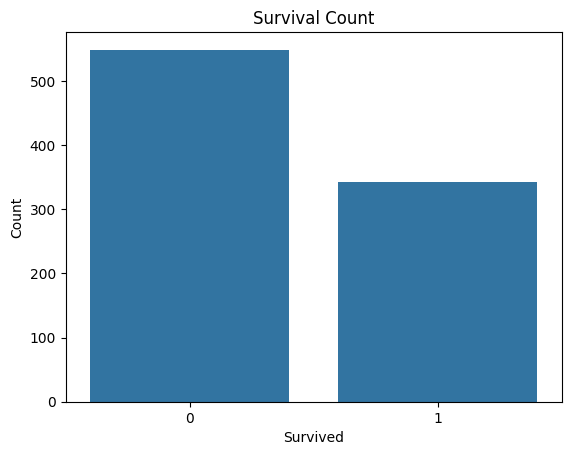

In [46]:

# Survival count
plt.figure()
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


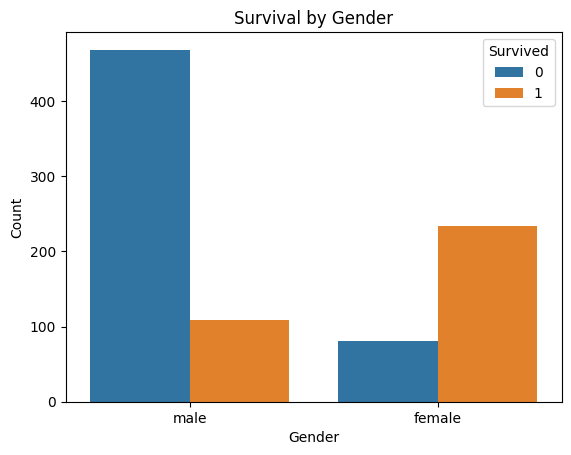

In [47]:

# Survival by Gender
plt.figure()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


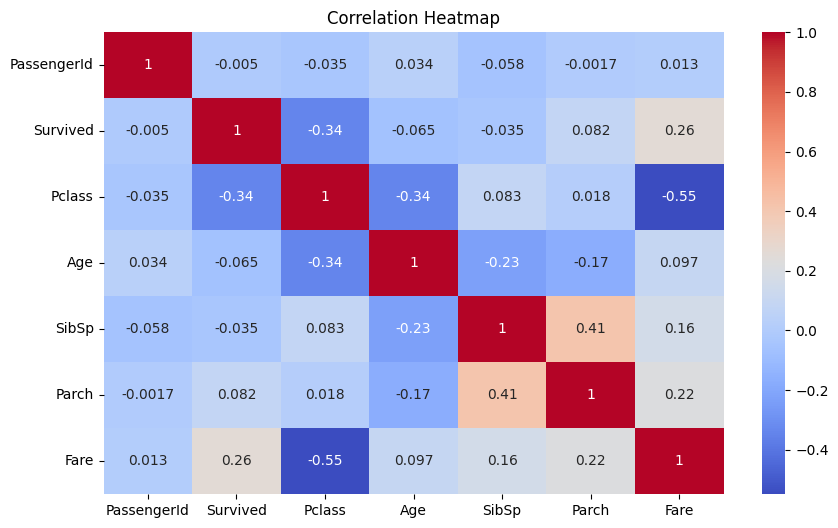

In [48]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## 5. Insights from EDA

- Females had a significantly higher survival rate than males.
- Age shows a mild correlation with survival.
- Passenger class is strongly correlated with survival outcome.
- These insights suggest that **Sex, Age, and Pclass** will be important features for future predictive modeling.

The findings from this EDA phase will guide feature selection and model building in the next deliverables.



## 6. Conclusion

This deliverable focused on preparing the dataset for modeling by performing data cleaning and exploratory analysis. The insights gained provide a strong foundation for regression and classification modeling in the next phase.
